/home/yuntian/anaconda3/envs/linux_QNM_env/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


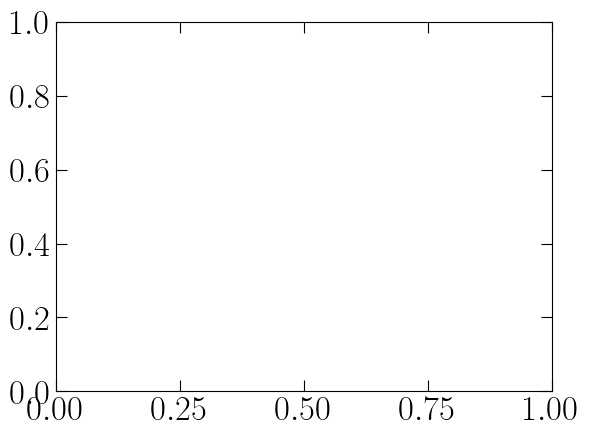

In [1]:
import numpy as np
import scipy
from scipy import stats
import My_Fitting
import qnm
from kuibit import simdir as sd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import LogNorm
import pickle
from adjustText import adjust_text
from scipy.interpolate import interp1d

plt.rcParams["xtick.labelsize"] = 25
plt.rcParams["ytick.labelsize"] = 25
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 8
plt.rcParams["ytick.major.size"] = 8
plt.rcParams["xtick.minor.size"] = 4
plt.rcParams["ytick.minor.size"] = 4
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.right"] = True
plt.rcParams["axes.labelpad"] = 8
plt.rcParams["figure.constrained_layout.h_pad"] = 0
plt.rcParams["text.usetex"] = True
plt.rcParams["font.sans-serif"] = ["Times New Roman"]
plt.rcParams["mathtext.fontset"] = "stix"
plt.tick_params(axis="both", which="minor", labelsize=18)

In [2]:
# 这里我们看一下怎么做外插，看看有没有现成的包

name_list=["0","1","5","10","20","30"]
i_name=0

with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name],\
pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name]+".pickle") as sim:
    print(sim)

timeseries=sim.ts
m1=timeseries.scalar["qlm_mass[0]"]
m2=timeseries.scalar["qlm_mass[1]"]
mt=timeseries.scalar["qlm_mass[2]"]
s1=timeseries.scalar["qlm_spin[0]"]
s2=timeseries.scalar["qlm_spin[1]"]
st=timeseries.scalar["qlm_spin[2]"]
q1=timeseries.scalar["qlm_charge[0]"]
q2=timeseries.scalar["qlm_charge[1]"]
qt=timeseries.scalar["qlm_charge[2]"]

Mf=mt(2000)
print(Mf)

Indexed 20261 files and 11 subdirectories
Folder /home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/0
/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/0
Available scalar timeseries:
['qlm_time[0]', 'qlm_time[1]', 'qlm_time[2]', 'qlm_equatorial_circumference[0]', 'qlm_equatorial_circumference[1]', 'qlm_equatorial_circumference[2]', 'qlm_polar_circumference_0[0]', 'qlm_polar_circumference_0[1]', 'qlm_polar_circumference_0[2]', 'qlm_polar_circumference_pi_2[0]', 'qlm_polar_circumference_pi_2[1]', 'qlm_polar_circumference_pi_2[2]', 'qlm_area[0]', 'qlm_area[1]', 'qlm_area[2]', 'qlm_irreducible_mass[0]', 'qlm_irreducible_mass[1]', 'qlm_irreducible_mass[2]', 'qlm_radius[0]', 'qlm_radius[1]', 'qlm_radius[2]', 'qlm_spin_guess[0]', 'qlm_spin_guess[1]', 'qlm_spin_guess[2]', 'qlm_mass_guess[0]', 'qlm_mass_guess[1]', 'qlm_mass_guess[2]', 'qlm_killing_eigenvalue_re[0]', 'qlm_killing_eigenvalue_re[1]', 'qlm_killing_eigenvalue_re[2]', 'qlm_killing_eigenvalue_im[0]', 'qlm_killing_eigenvalue_im[1]', '

(1800.0, 2000.0)

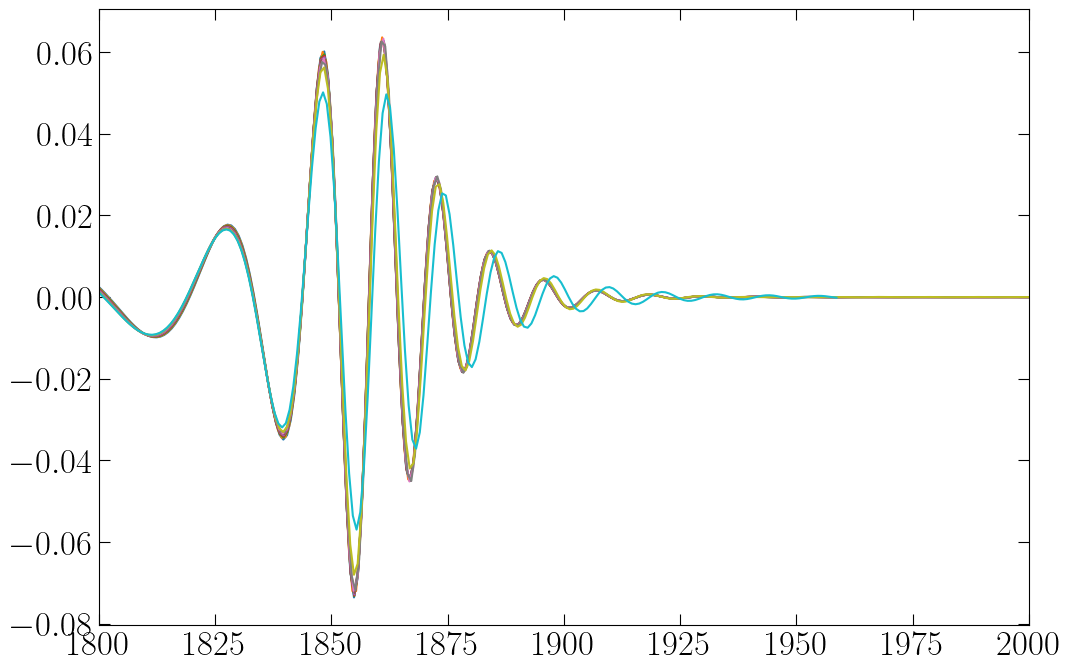

In [3]:
r_list=[44.78,48.95,53.96,60.13,67.88,77.93,91.46,110.69,140.16,191.0]

plt.figure(figsize=(12,8))
for i in range(len(r_list)):
    psi4=sim.multipoles["psi4"][r_list[i]]
    psi4_22=psi4[2,2]
    t=psi4_22.t
    psi4_r=psi4_22.y.real
    psi4_i=psi4_22.y.imag
    plt.plot(t-(r_list[i]+2*Mf*np.log(r_list[i]/2/Mf-1)),psi4_r*r_list[i])

dt=t[1]-t[0]
plt.xlim([1800,2000])

Text(0, 0.5, '$|r\\psi_4^{22}|$')

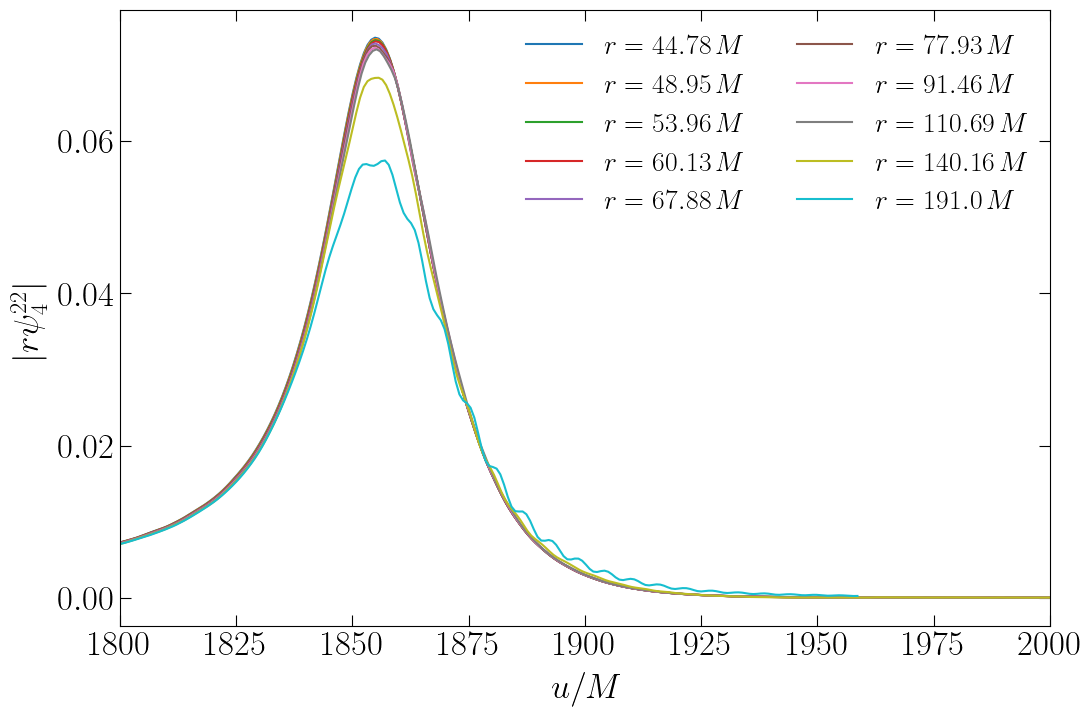

In [4]:
# 我们先来画画A和phi
# 我们不使用140.16的数据因为它看起来和别的差别太大了
r_list=[44.78,48.95,53.96,60.13,67.88,77.93,91.46,110.69,140.16,191.0]

plt.figure(figsize=(12,8))
for i in range(len(r_list)):
    psi4=sim.multipoles["psi4"][r_list[i]]
    psi4_22=psi4[2,2]
    t=psi4_22.t
    psi4_r=psi4_22.y.real
    psi4_i=psi4_22.y.imag
    plt.plot(t-(r_list[i]+2*Mf*np.log(r_list[i]/2/Mf-1)),(psi4_r**2+psi4_i**2)**(1/2)*r_list[i],label=fr"$r={r_list[i]}\,M$")

plt.xlim([1800,2000])
plt.legend(fontsize=20, frameon=False, ncol=2)
plt.xlabel(r"$u/M$",fontsize=25)
plt.ylabel(r"$|r\psi_4^{22}|$",fontsize=25)

(1800.0, 2000.0)

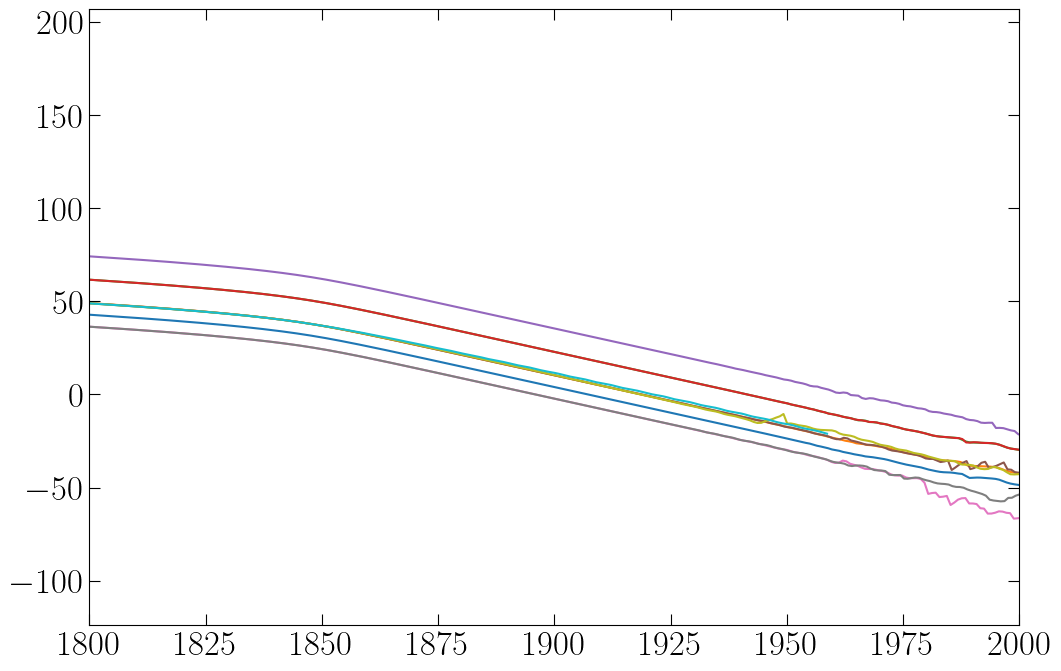

In [7]:
r_list=[44.78,48.95,53.96,60.13,67.88,77.93,91.46,110.69,140.16,191.0]

plt.figure(figsize=(12,8))
for i in range(len(r_list)):
    psi4=sim.multipoles["psi4"][r_list[i]]
    psi4_22=psi4[2,2]
    t=psi4_22.t
    psi4_r=psi4_22.y.real
    psi4_i=psi4_22.y.imag
    phi=np.zeros(len(t))
    n=-30
    for j in range(len(t)):
        phi[j]=np.arctan2(psi4_i[j],psi4_r[j])
        if(j!=0):
            if(phi[j]-(phi[j-1]+2*np.pi*n)>np.pi):
                n+=1
        phi[j]-=2*np.pi*n
    plt.plot(t-(r_list[i]+2*Mf*np.log(r_list[i]/2/Mf-1)),phi)
    
plt.xlim([1800,2000])

In [8]:
# 按文章中的讲法，对A phi做外插效果更好
# 我们首先就先对u插值来给大家的数据都做好
# 我们的插值也可以对A和phi做，线性插值似乎也更适用于这里
# 我们不应该人为增加分辨率，所以我们dt还是取0.8
# 我们使用线性插值

r_list=[44.78,48.95,53.96,60.13,67.88,77.93,91.46,110.69,140.16]
u=np.linspace(1800,2000,int((2000-1800)/dt+1))

A_intep=[]
phi_intep=[]

for i in range(len(r_list)):
    psi4=sim.multipoles["psi4"][r_list[i]]
    psi4_22=psi4[2,2]
    t=psi4_22.t
    psi4_r=psi4_22.y.real
    psi4_i=psi4_22.y.imag

    A=(psi4_r**2+psi4_i**2)**(1/2)*r_list[i]
    f_A=interp1d(t-(r_list[i]+2*Mf*np.log(r_list[i]/2/Mf-1)), A, kind='linear')
    A_intep.append(f_A)

    phi=np.zeros(len(t))
    n=-30
    for j in range(len(t)):
        phi[j]=np.arctan2(psi4_i[j],psi4_r[j])
        if(j!=0):
            if(phi[j]-(phi[j-1]+2*np.pi*n)>np.pi):
                n+=1
        phi[j]-=2*np.pi*n
    f_phi=interp1d(t-(r_list[i]+2*Mf*np.log(r_list[i]/2/Mf-1)), phi, kind='linear')
    phi_intep.append(f_phi)


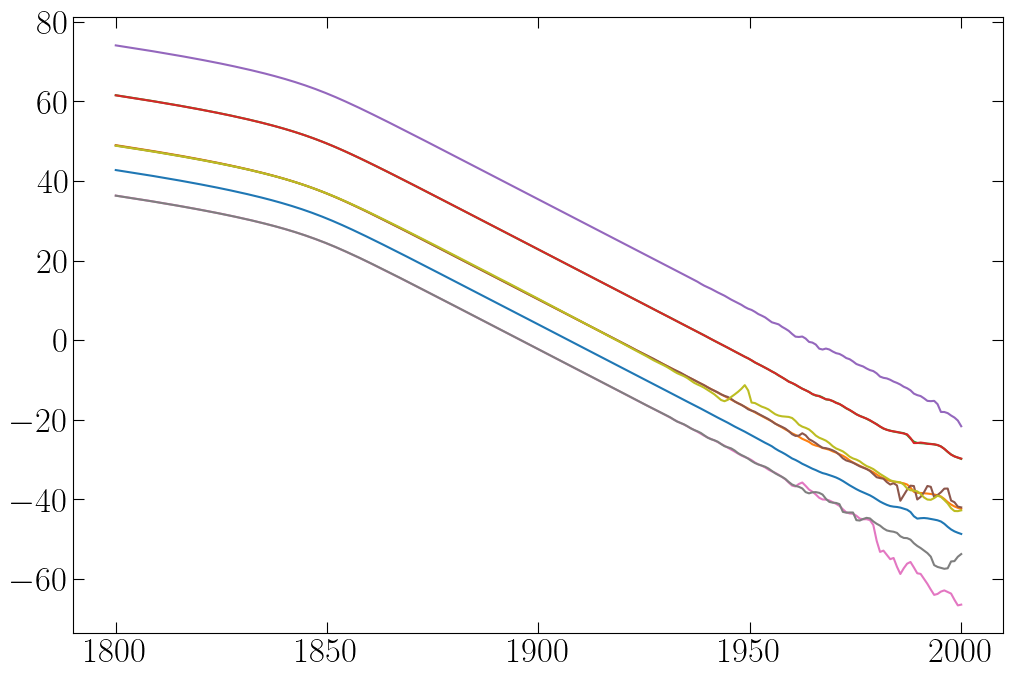

In [9]:
plt.figure(figsize=(12,8))
for i in range(len(r_list)):
    plt.plot(u,phi_intep[i](u))

Text(0, 0.5, '$|\\psi_4^{22}|(u)$')

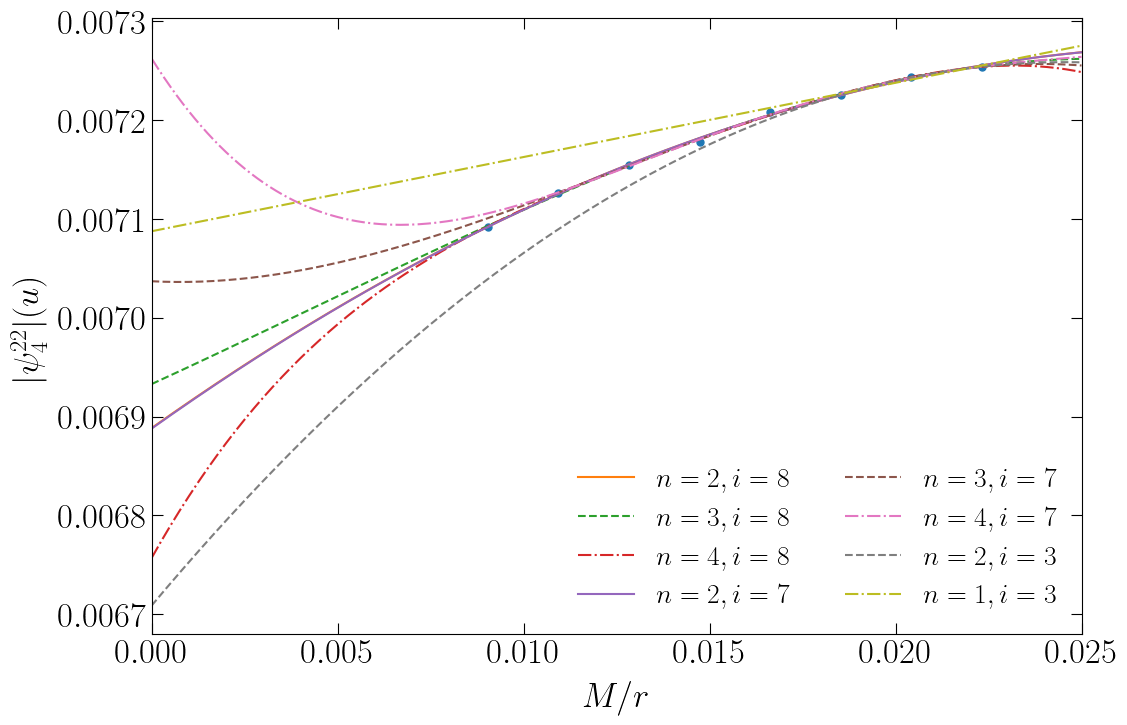

In [10]:
# 外插之前,我们能否画下图,以1/r为横坐标看看效果
# u_list=[1800,1850,1900,1950]
u_list=[1800]
# 先来看A的效果
# r_list=[44.78,48.95,53.96,60.13,67.88,77.93,91.46,110.69,140.16]
r_list=[44.78,48.95,53.96,60.13,67.88,77.93,91.46,110.69]

plt.figure(figsize=(12,8))

inv_r=np.zeros(len(r_list))
for i in range(len(r_list)):
    inv_r[i]=1/r_list[i]

Ar_list=np.zeros(len(r_list))
for i_u in range(len(u_list)):
    for i in range(len(r_list)):
        Ar_list[i]=A_intep[i](u_list[i_u])
    plt.plot(inv_r,Ar_list,'.',markersize=10)
    coeffs=np.polyfit(inv_r,Ar_list,deg=2)
    x_fit=np.linspace(0,0.025,300)
    y_fit=np.polyval(coeffs,x_fit)
    plt.plot(x_fit,y_fit,label=r"$n=2,i=8$")

    coeffs=np.polyfit(inv_r,Ar_list,deg=3)
    x_fit=np.linspace(0,0.025,300)
    y_fit=np.polyval(coeffs,x_fit)
    plt.plot(x_fit,y_fit,'--',label=r"$n=3,i=8$")

    coeffs=np.polyfit(inv_r,Ar_list,deg=4)
    x_fit=np.linspace(0,0.025,300)
    y_fit=np.polyval(coeffs,x_fit)
    plt.plot(x_fit,y_fit,'-.',label=r"$n=4,i=8$")

    coeffs=np.polyfit(inv_r[0:-1],Ar_list[0:-1],deg=2)
    x_fit=np.linspace(0,0.025,300)
    y_fit=np.polyval(coeffs,x_fit)
    plt.plot(x_fit,y_fit,'-',label=r"$n=2,i=7$")

    coeffs=np.polyfit(inv_r[0:-1],Ar_list[0:-1],deg=3)
    x_fit=np.linspace(0,0.025,300)
    y_fit=np.polyval(coeffs,x_fit)
    plt.plot(x_fit,y_fit,'--',label=r"$n=3,i=7$")

    coeffs=np.polyfit(inv_r[0:-1],Ar_list[0:-1],deg=4)
    x_fit=np.linspace(0,0.025,300)
    y_fit=np.polyval(coeffs,x_fit)
    plt.plot(x_fit,y_fit,'-.',label=r"$n=4,i=7$")

    coeffs=np.polyfit(inv_r[0:3],Ar_list[0:3],deg=2)
    x_fit=np.linspace(0,0.025,300)
    y_fit=np.polyval(coeffs,x_fit)
    plt.plot(x_fit,y_fit,'--',label=r"$n=2,i=3$")

    coeffs=np.polyfit(inv_r[0:3],Ar_list[0:3],deg=1)
    x_fit=np.linspace(0,0.025,300)
    y_fit=np.polyval(coeffs,x_fit)
    plt.plot(x_fit,y_fit,'-.',label=r"$n=1,i=3$")


plt.legend(fontsize=20,frameon=False,ncol=2)

plt.xlim([0,0.025])
plt.xlabel(r"$M/r$",fontsize=25)
plt.ylabel(r"$|\psi_4^{22}|(u)$",fontsize=25)
# plt.title(r"$u=1875\,M$",fontsize=25)

Text(0, 0.5, '$|r\\psi_4^{22}|$')

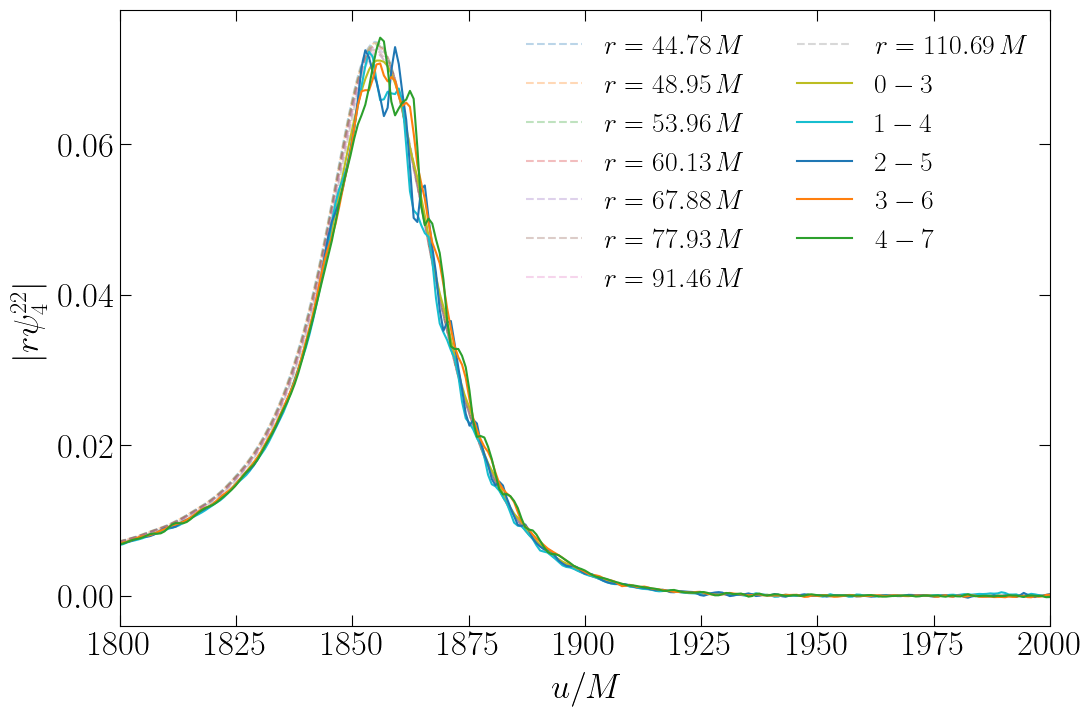

In [18]:
# 然后我们就还是再画一个包含外插的图吧

r_list=[44.78,48.95,53.96,60.13,67.88,77.93,91.46,110.69]

plt.figure(figsize=(12,8))
for i in range(len(r_list)):
    psi4=sim.multipoles["psi4"][r_list[i]]
    psi4_22=psi4[2,2]
    t=psi4_22.t
    psi4_r=psi4_22.y.real
    psi4_i=psi4_22.y.imag
    plt.plot(t-(r_list[i]+2*Mf*np.log(r_list[i]/2/Mf-1)),(psi4_r**2+psi4_i**2)**(1/2)*r_list[i],'--',label=fr"$r={r_list[i]}\,M$",alpha=0.3)


# 然后是外插
u_list=np.linspace(1800,2000,int((2000-1800)/dt+1))

inv_r=np.zeros(len(r_list))
for i in range(len(r_list)):
    inv_r[i]=1/r_list[i]

Au=np.zeros(len(u))

# for i_u in range(len(u_list)):
#     for i in range(len(r_list)):
#         Ar_list[i]=A_intep[i](u_list[i_u])
#     coeffs=np.polyfit(inv_r[0:3],Ar_list[0:3],deg=2)
#     Au[i_u]=coeffs[-1]
# plt.plot(u_list,Au,label=r"$n=2,i=3$")

for i_u in range(len(u_list)):
    for i in range(len(r_list)):
        Ar_list[i]=A_intep[i](u_list[i_u])
    coeffs=np.polyfit(inv_r[0:4],Ar_list[0:4],deg=2)
    Au[i_u]=coeffs[-1]
plt.plot(u_list,Au,label=r"$0-3$")

for i_u in range(len(u_list)):
    for i in range(len(r_list)):
        Ar_list[i]=A_intep[i](u_list[i_u])
    coeffs=np.polyfit(inv_r[1:5],Ar_list[1:5],deg=2)
    Au[i_u]=coeffs[-1]
plt.plot(u_list,Au,label=r"$1-4$")

for i_u in range(len(u_list)):
    for i in range(len(r_list)):
        Ar_list[i]=A_intep[i](u_list[i_u])
    coeffs=np.polyfit(inv_r[2:6],Ar_list[2:6],deg=2)
    Au[i_u]=coeffs[-1]
plt.plot(u_list,Au,label=r"$2-5$")

for i_u in range(len(u_list)):
    for i in range(len(r_list)):
        Ar_list[i]=A_intep[i](u_list[i_u])
    coeffs=np.polyfit(inv_r[3:7],Ar_list[3:7],deg=2)
    Au[i_u]=coeffs[-1]
plt.plot(u_list,Au,label=r"$3-6$")

for i_u in range(len(u_list)):
    for i in range(len(r_list)):
        Ar_list[i]=A_intep[i](u_list[i_u])
    coeffs=np.polyfit(inv_r[4:8],Ar_list[4:8],deg=2)
    Au[i_u]=coeffs[-1]
plt.plot(u_list,Au,label=r"$4-7$")


plt.xlim([1800,2000])
plt.legend(fontsize=20, frameon=False, ncol=2)
plt.xlabel(r"$u/M$",fontsize=25)
plt.ylabel(r"$|r\psi_4^{22}|$",fontsize=25)